In [292]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [293]:
from bart_playground import Tree, Parameters
from bart_playground import Break
from bart_playground import Combine
from bart_playground import Dataset
from bart_playground import visualize_tree 
from bart_playground import *  # Import the updated DataGenerator class

In [294]:
dgen = DataGenerator(n_samples=100, n_features=3, noise=0.1, random_seed=42)
X, y = dgen.generate(scenario="linear")
data = Dataset(X, y, X)

rng = np.random.default_rng()

In [295]:
def tearDown(filename):
    expected_filepath = f"{filename}.png"
    if os.path.exists(expected_filepath):
        os.remove(expected_filepath)

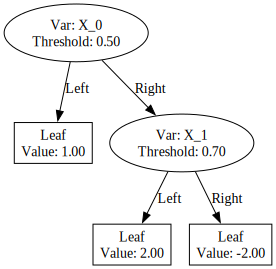

In [296]:
tree1 = Tree(data=data)
tree1.vars = np.array([0,-1, 1, -2, -2, -1, -1, -2], dtype=int)
tree1.thresholds = np.array([0.5, np.nan, 0.7, np.nan, np.nan, np.nan, np.nan, np.nan])
tree1.leaf_vals = np.array([np.nan, 1.0, np.nan, np.nan, np.nan, 2.0, -2.0, np.nan])
filename1 = "tree1"
visualize_tree(tree1, tree1, filename=filename1, format="png")

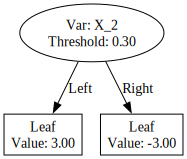

In [297]:
tree2 = Tree(data=data)
tree2.vars = np.array([2,-1, -1, -2], dtype=int)
tree2.thresholds = np.array([0.3, np.nan, np.nan, np.nan])
tree2.leaf_vals = np.array([np.nan, 3.0, -3.0, np.nan])
filename2 = "tree2"
visualize_tree(tree2, tree2, filename=filename2, format="png")

In [298]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)
params.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.5 nan 0.7 nan nan nan nan nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2]),
 Tree(vars=[ 2 -1 -1 -2], thresholds=[0.3 nan nan nan], leaf_vals=[nan  3. -3. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2])]

In [299]:
tearDown(filename1)
tearDown(filename2)

In [300]:
node_id = rng.choice(tree1.split_nodes)
node_id

0

In [301]:
move = Break(params, trees_changed=[0])
move.propose(rng)


True

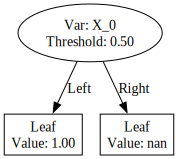

In [302]:
tree_b1 = move.proposed.trees[-2]
filename1 = "tree_b1"
visualize_tree(tree_b1, tree_b1, filename=filename1, format="png")

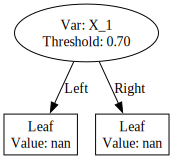

In [303]:
tree_b2 = move.proposed.trees[-1]
filename2 = "tree_b2"
visualize_tree(tree_b2, tree_b2, filename=filename2, format="png")

In [304]:
tearDown(filename1)
tearDown(filename2)

In [305]:
tree3 = Tree(data=data)
tree4 = Tree(data=data)
trees_combine = [tree3,tree4]
params_combine = Parameters(trees_combine, None, data)
move = Grow(params_combine,trees_changed=[0])
move.propose(rng)
tree3=move.proposed.trees[0]
tree3

Tree(vars=[ 1 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.09417735        nan        nan        nan        nan        nan
        nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  11  89  -2  -2  -2  -2  -2])

In [306]:
move = Grow(params_combine,trees_changed=[1])
move.propose(rng)
tree4=move.proposed.trees[1]
tree4

Tree(vars=[ 1 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.69736803        nan        nan        nan        nan        nan
        nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  69  31  -2  -2  -2  -2  -2])

In [307]:
params=Parameters([tree3,tree4],None,data)

In [308]:
move = Combine(params,trees_changed=[0,1])
move.propose(rng)

True

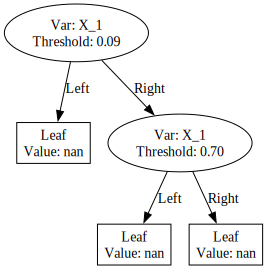

In [309]:
tree_c1 = move.proposed.trees[-1]
filename1 = "tree_c1"
visualize_tree(tree_c1, tree_c1, filename=filename1, format="png")

In [310]:
tearDown(filename=filename1)